# Importing the libraries

In [1]:
!Pip install sklearn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!Pip install Seaborn

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import numpy as np # Numerical Python -> Mathematical Operation
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Visualisation
import seaborn as sns # Data Visualisation
import re # Data Cleaning
from sklearn.linear_model import LinearRegression # ML Algorithm
from sklearn.model_selection import train_test_split # Splitting the dataset into training & testing set
from sklearn.metrics import r2_score # Accuracy Metric
from sklearn.preprocessing import LabelEncoder # Convert the categorical data into numerical data
import pickle

# Dataset

In [4]:
df=pd.read_csv(r'C:\Users\dell\Desktop\Housing Linear regression.csv')

# Data Analysis

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [7]:
df.shape[0]   #No. of columns

545

In [8]:
df.shape[1]    # no. of rows

13

In [9]:
df.shape     # total no. of columns and row

(545, 13)

In [10]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [11]:
len(df.columns)

13

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [13]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [14]:
df.dtypes 

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [15]:
# Convert these object to int becoz machine machine only understand integer

In [16]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [17]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [18]:
df.isnull().sum().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

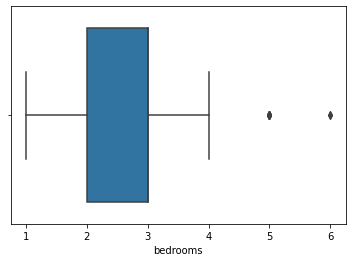

In [19]:
sns.boxplot(df.bedrooms) # checking for the outliers

In [20]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [21]:
df.mainroad.unique()

array(['yes', 'no'], dtype=object)

In [22]:
df.mainroad.replace(['yes','no'],[0,1])

0      0
1      0
2      0
3      0
4      0
      ..
540    0
541    1
542    0
543    1
544    0
Name: mainroad, Length: 545, dtype: int64

In [23]:
newdf=df.copy()

In [24]:
enc=LabelEncoder()

In [25]:
newdf.mainroad

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
540    yes
541     no
542    yes
543     no
544    yes
Name: mainroad, Length: 545, dtype: object

In [26]:
newdf.mainroad.value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [27]:
newdf.mainroad= enc.fit_transform(newdf.mainroad)

In [28]:
newdf.mainroad.unique()

array([1, 0])

In [29]:
newdf.mainroad.value_counts()

1    468
0     77
Name: mainroad, dtype: int64

In [30]:
newdf.shape

(545, 13)

In [31]:
468/545

0.8587155963302753

In [32]:
df.mainroad = enc.fit_transform(df.mainroad)
df.guestroom = enc.fit_transform(df.guestroom)
df.basement = enc.fit_transform(df.basement)
df.hotwaterheating = enc.fit_transform(df.hotwaterheating)
df.airconditioning  = enc.fit_transform(df.airconditioning)
df.prefarea= enc.fit_transform(df.prefarea)
# convert all object to int

In [33]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [34]:
df.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [35]:
df.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [36]:
df.furnishingstatus= enc.fit_transform(df.furnishingstatus)

In [37]:
df.furnishingstatus.value_counts()

1    227
2    178
0    140
Name: furnishingstatus, dtype: int64

In [38]:
# semi-furnished ->1
# unfurnished ->2
# furnished ->0

# Observation

1. data strength: 545
2. no. random variable: 13   (no. of rows)
3. no. of feature : 12 
4. none of the columns contain Null value
5. columns- were having numerical value
6. Columns- were having categorical value

In [39]:
df.shape

(545, 13)

In [40]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [41]:
df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int32
guestroom           int32
basement            int32
hotwaterheating     int32
airconditioning     int32
parking             int64
prefarea            int32
furnishingstatus    int32
dtype: object

In [42]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [43]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


<AxesSubplot:>

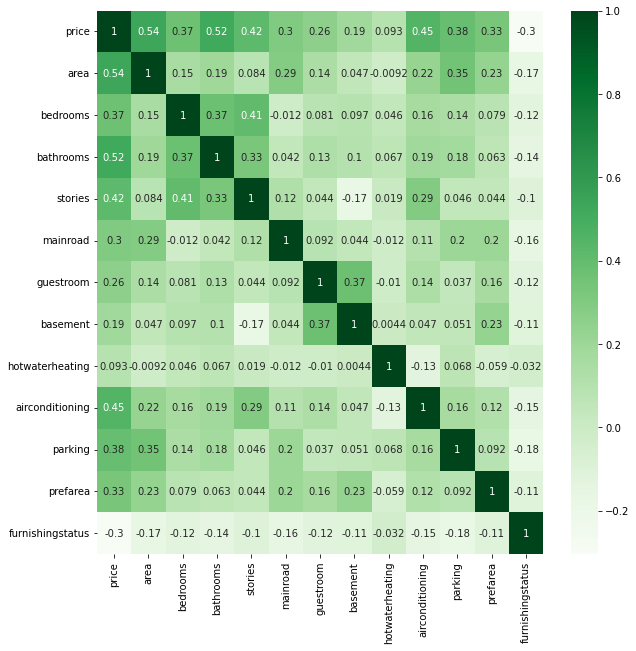

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True ,cmap='Greens')

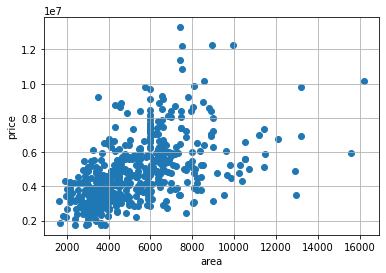

In [45]:
plt.scatter(df.area,df.price)
plt.xlabel('area')
plt.ylabel('price')
plt.grid()

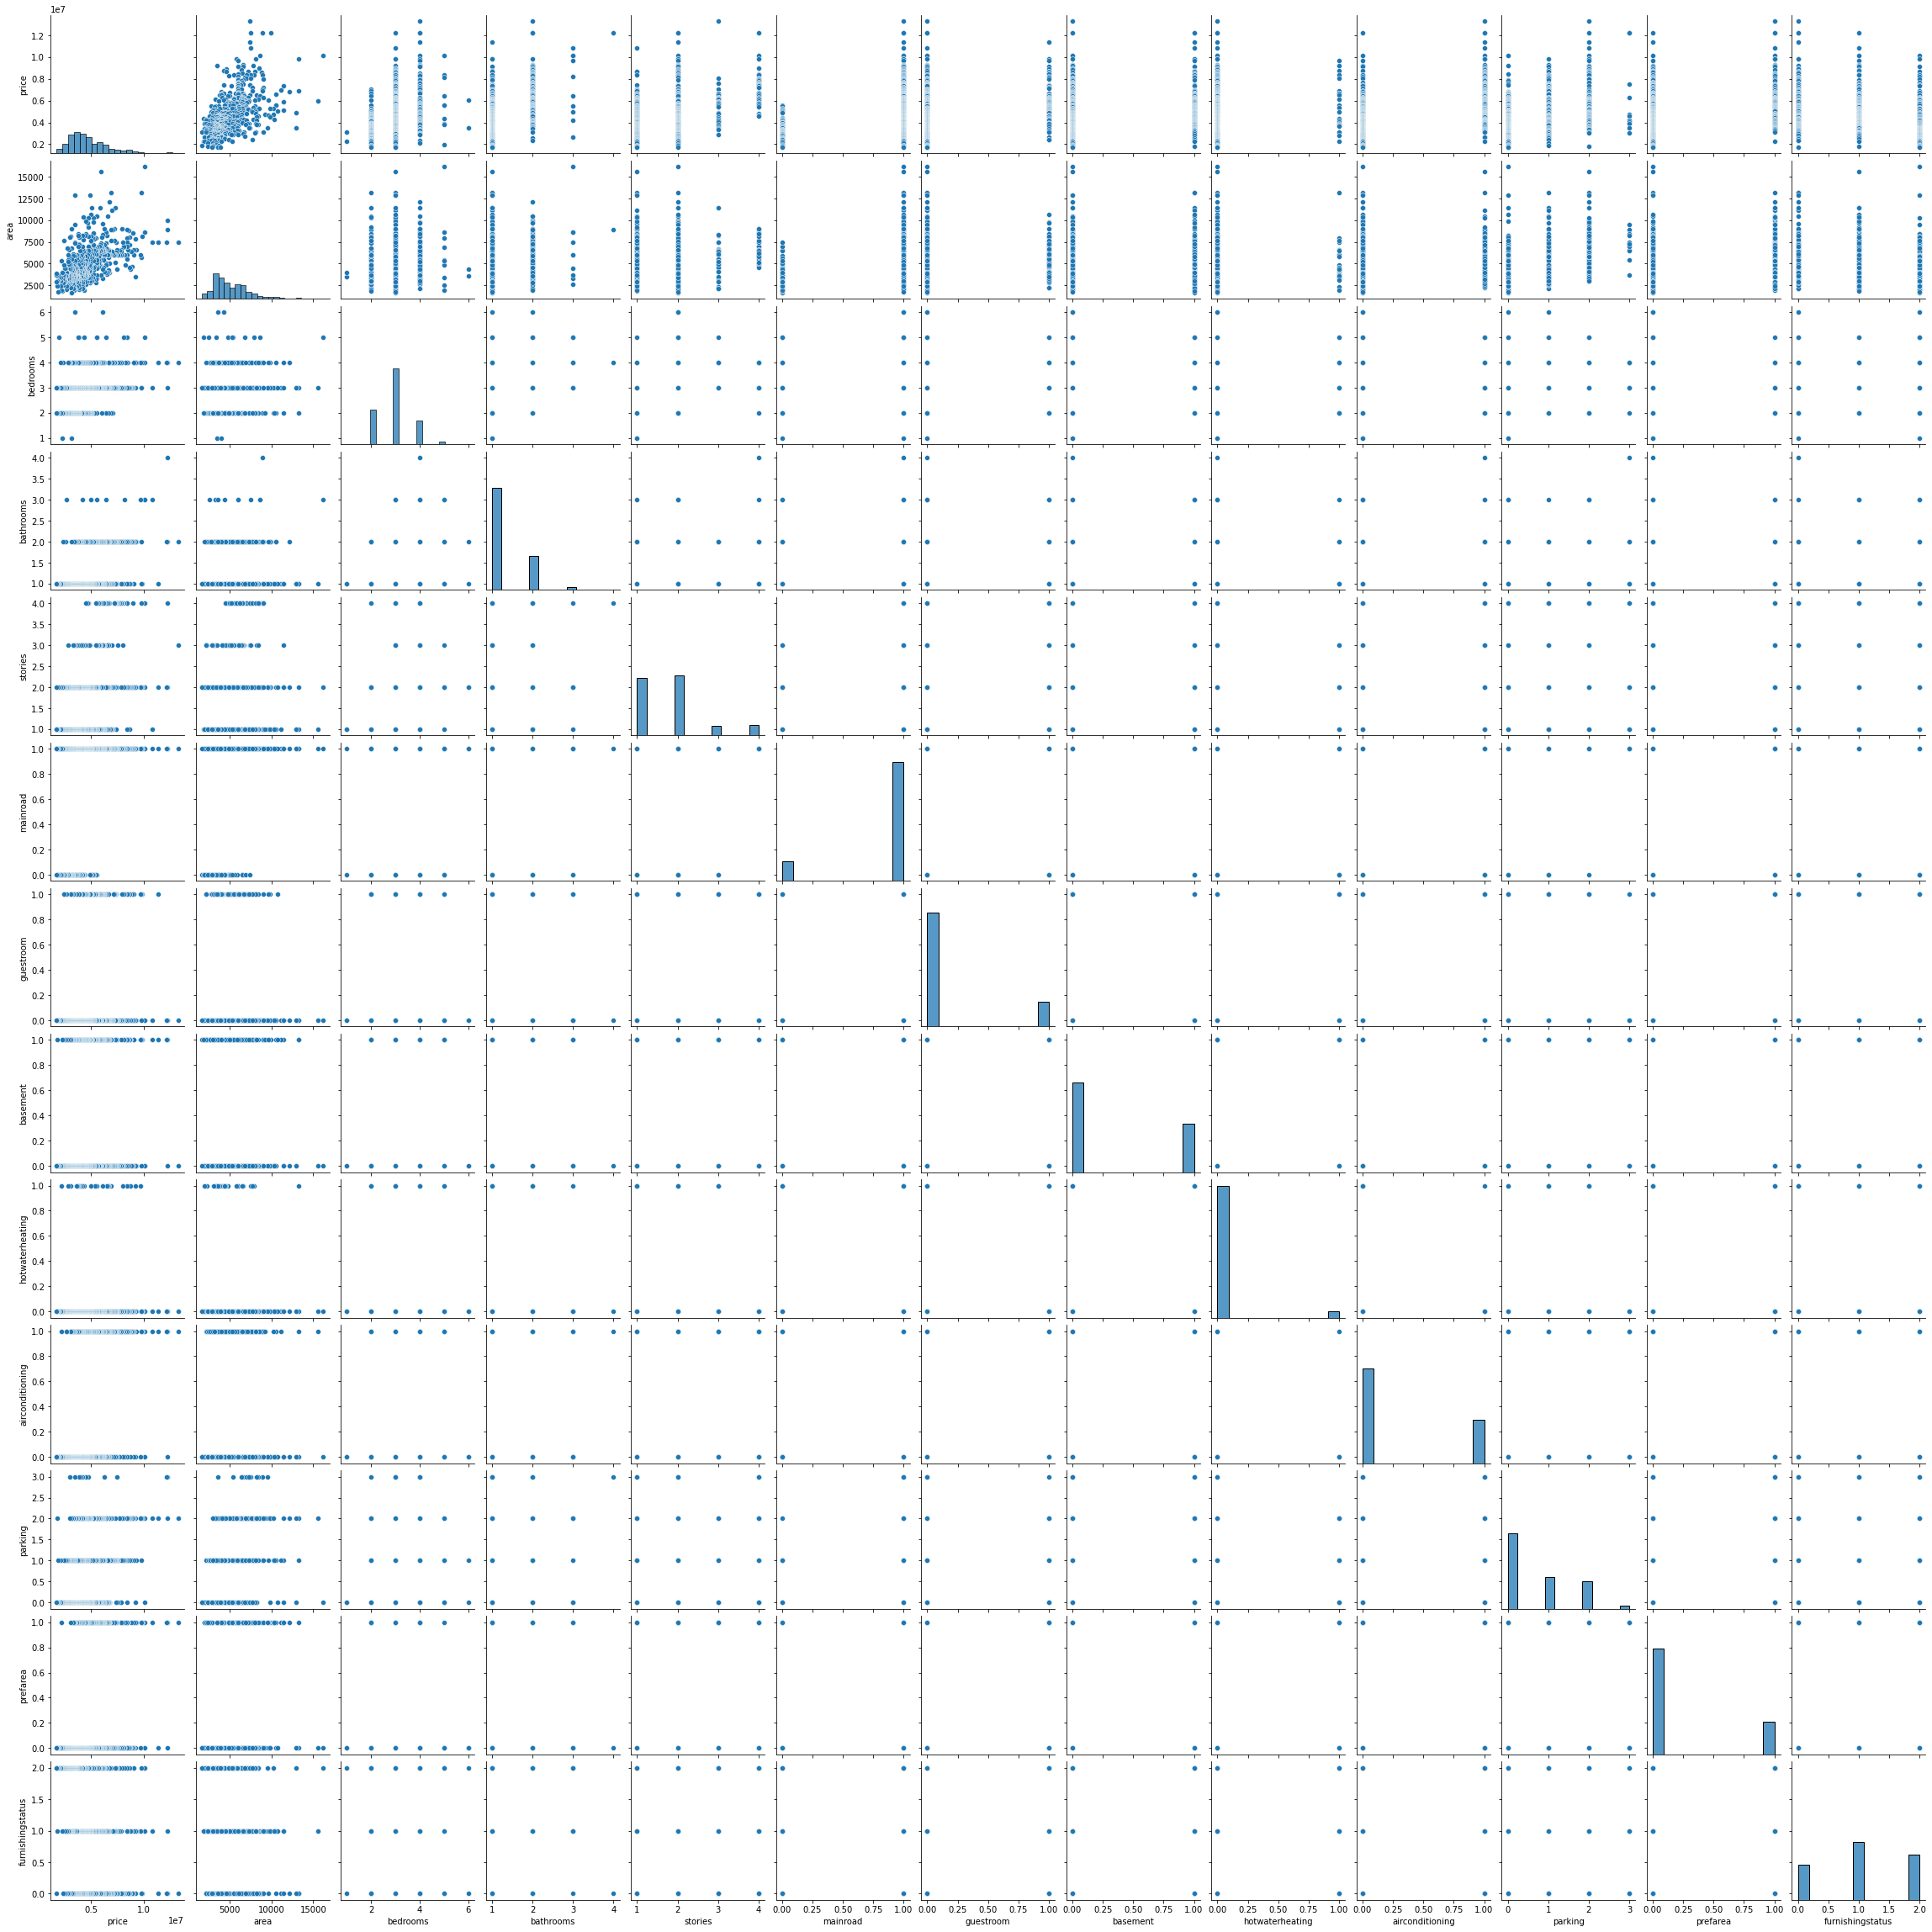

In [46]:
sns.pairplot(df)

<AxesSubplot:>

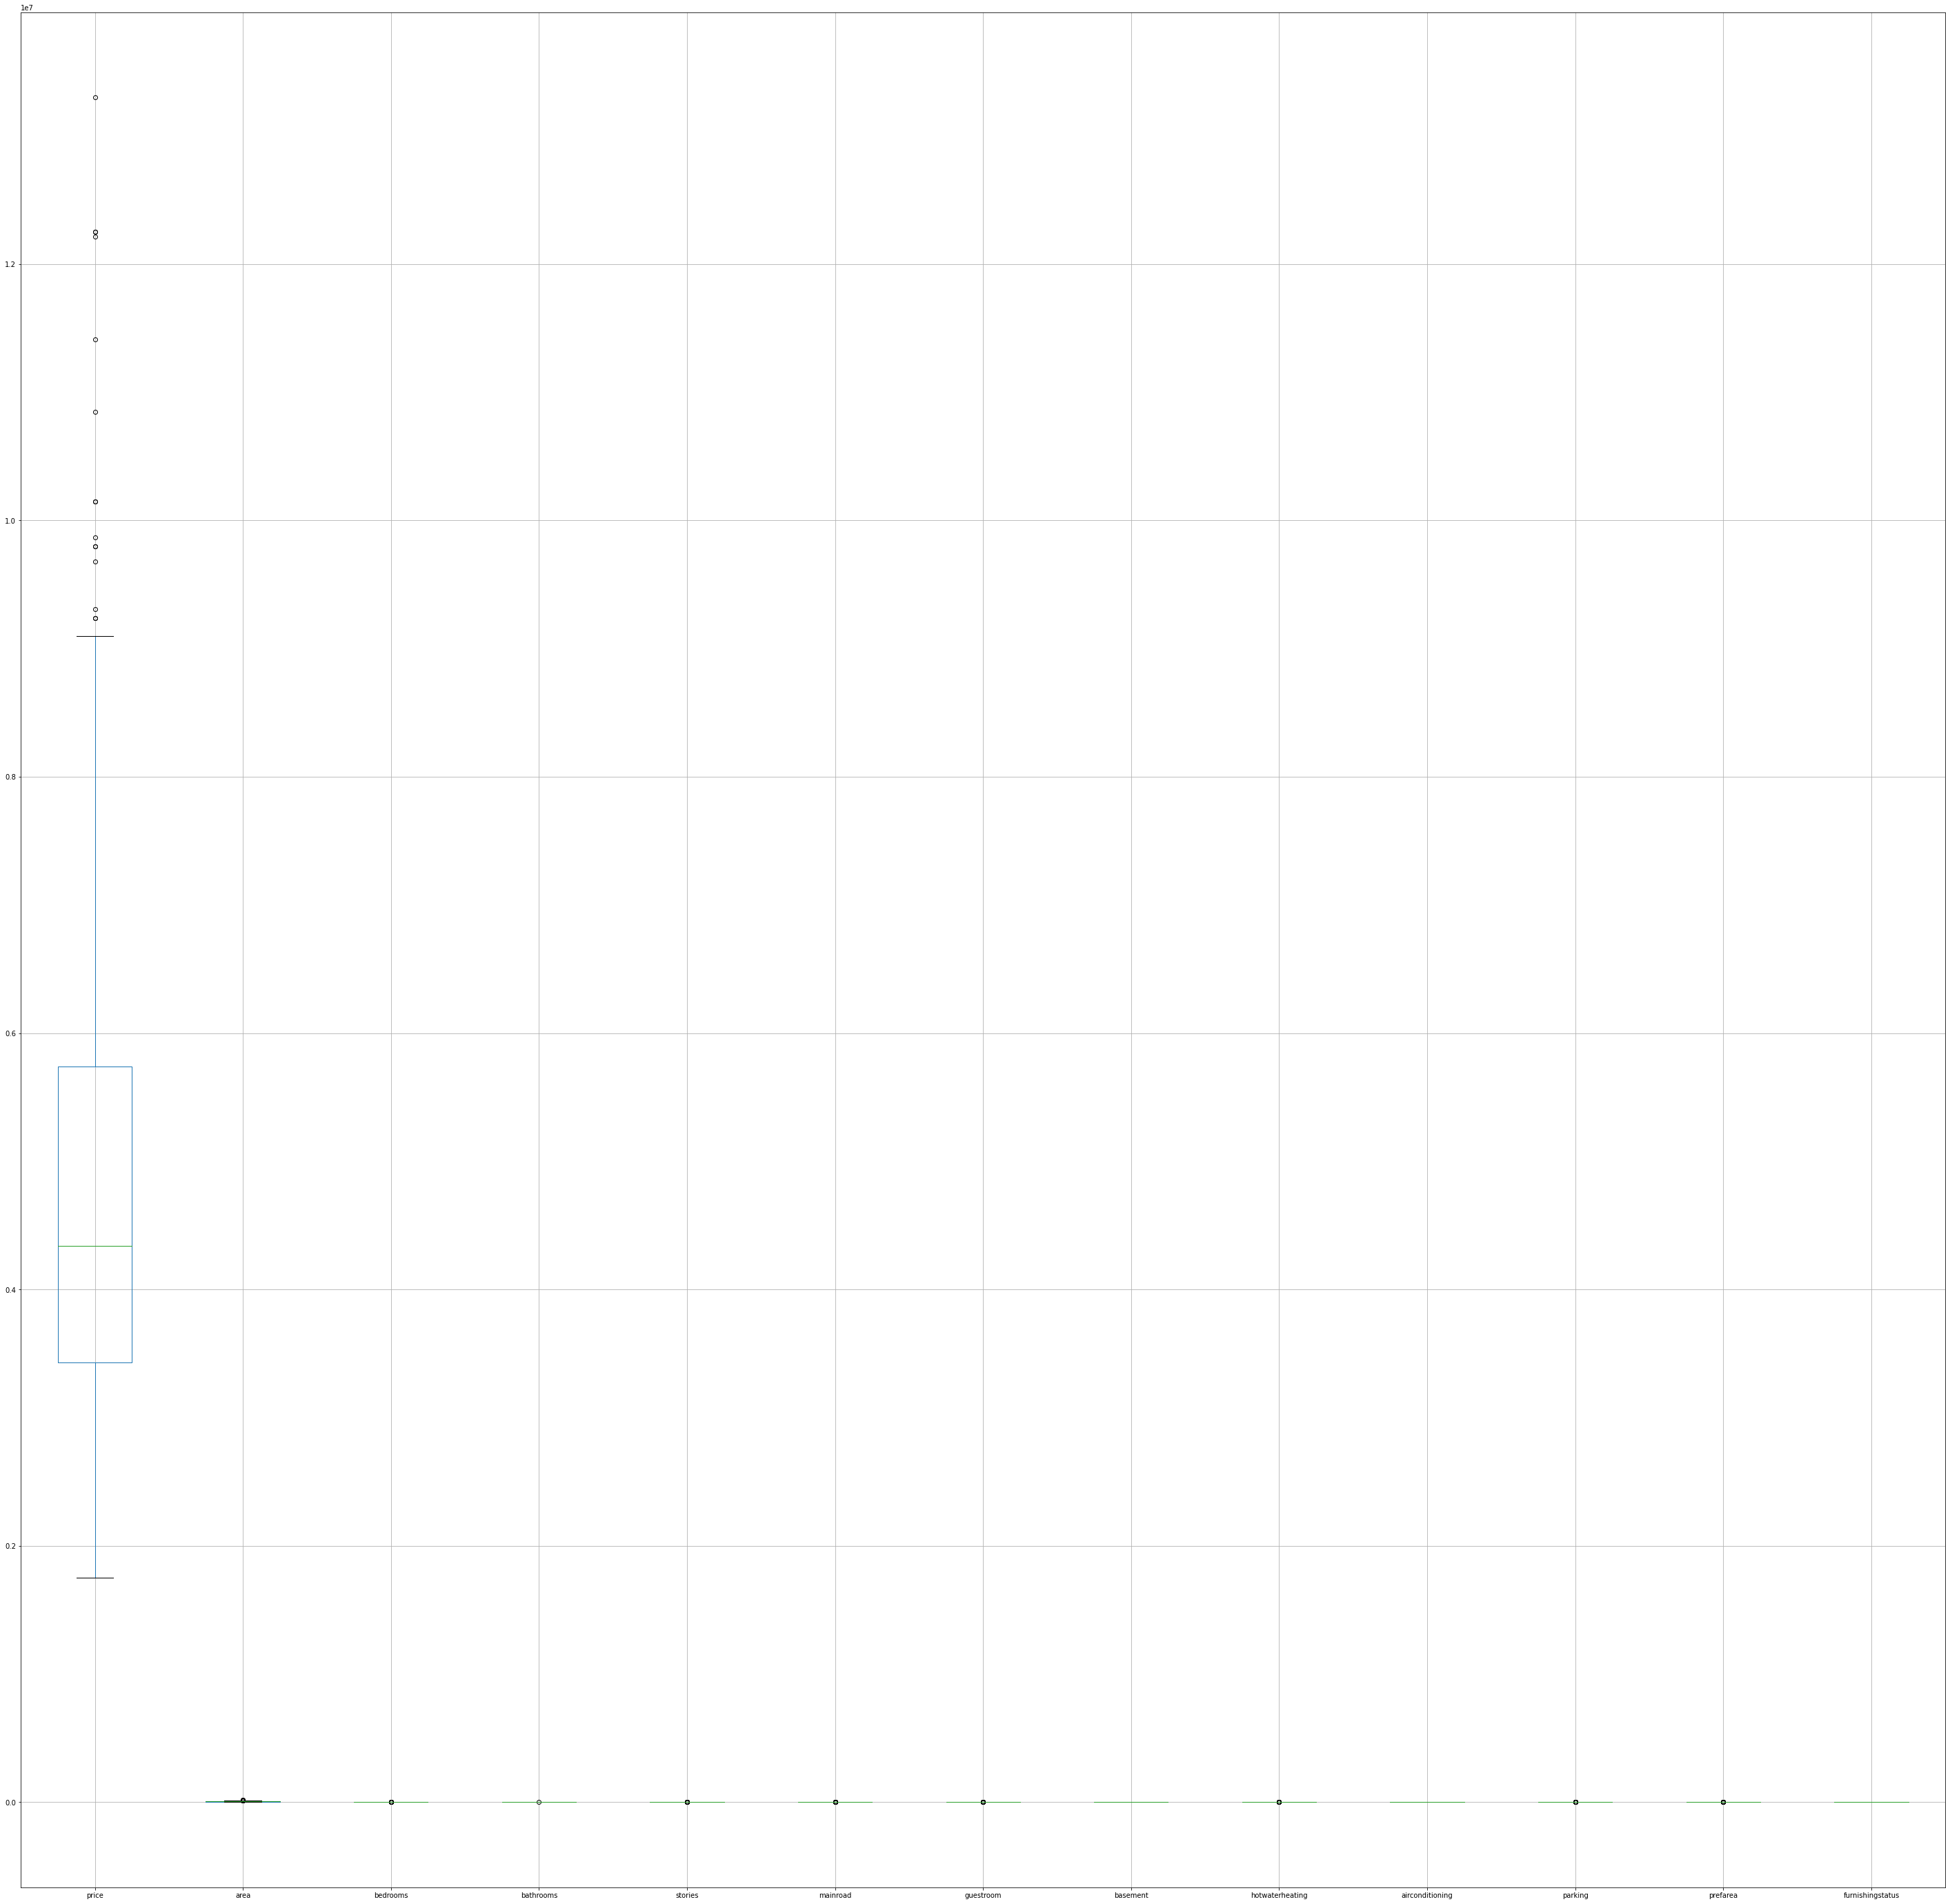

In [47]:
plt.figure(figsize=(50,50))
df.boxplot()

In [48]:
df.bedrooms.unique()

array([4, 3, 5, 2, 6, 1], dtype=int64)

In [49]:
df.bedrooms.value_counts()

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64

<AxesSubplot:>

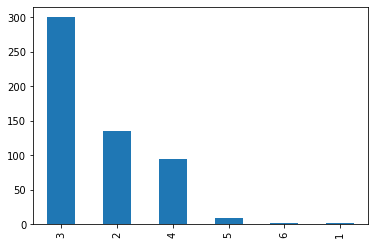

In [50]:
# how many datapoints are there where bedrooms are more then 47?
df.bedrooms.value_counts().plot.bar()

# Machine learning

In [51]:
model= LinearRegression()

### ~ Defining The Independent and Dependent variable

In [52]:
df.head(1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0


In [53]:
x= df.drop('price', axis=1)
y= df.price

In [54]:
x.ndim

2

In [55]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [56]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

### Train Test Split

In [57]:
x_train, x_test, y_train, y_test =train_test_split(x,y, train_size=0.2)

In [58]:
len(x)

545

In [59]:
len(x_train)

109

In [60]:
len(x_test)

436

In [61]:
len(y)

545

In [62]:
len(y_train)

109

In [63]:
len(y_test)

436

## Training the model

In [64]:
model.fit(x_train,y_train)

LinearRegression()

In [65]:
#   y= mx+c
#   model.coef_ => m
#   model.intercept_ =>c

In [66]:
model.coef_

array([2.85272103e+02, 8.16219419e+04, 1.00743370e+06, 5.19044517e+05,
       3.83467226e+05, 4.24330852e+05, 9.51383041e+04, 9.08182846e+05,
       5.12932359e+05, 3.02829088e+05, 2.84992389e+05, 1.72914880e+04])

In [67]:
model.intercept_

-179671.9812648436

## Testing the model

In [68]:
y_pred = model.predict(x_test)

In [69]:
y_pred

array([ 6554699.87708232,  4093071.06675637,  8307367.93742602,
        4422688.09279852,  3598537.16362547,  3194533.29445954,
        3354002.0524731 ,  4908235.55786876,  2960785.33160894,
        4467189.30879181,  4576161.52035191,  5719112.23032123,
        5259388.88847362,  4568710.32529862,  4408975.85834844,
        3349624.32585318,  3131934.31213081,  3130311.65488618,
        3484713.1083609 ,  3090718.48074589,  5031732.45034384,
        4358152.11415611,  5204629.3377661 ,  7645560.16801799,
        3316765.96796203,  6432331.41046748,  3975362.26149333,
        3106429.49107011,  4233961.36536404,  2926552.67922565,
        4143624.15308301,  5194095.01624069,  3653457.6585864 ,
        3230511.69983225,  3284174.02729053,  6260807.5918562 ,
        7541443.27141349,  7320197.45678817,  2595541.39979471,
        6781562.99727776,  3350883.53116182,  5595675.61540294,
        3343049.9498891 ,  5160849.99277381,  2361906.73658518,
        6330584.44011346,  6898717.09928

In [70]:
newdf = pd.DataFrame({
     "Actual value": y_test,
    "Predicted value": y_pred
})

In [71]:
newdf.head(10)

,Actual value,Predicted value
111,6090000,6.554700e+06
325,4007500,4.093071e+06
37,7980000,8.307368e+06
255,4480000,4.422688e+06
471,3010000,3.598537e+06
380,3605000,3.194533e+06
303,4200000,3.354002e+06
205,4900000,4.908236e+06
542,1750000,2.960785e+06
278,4277000,4.467189e+06


# Performance

In [72]:
r2_score(y_test,y_pred)

0.6306196052737176

In [73]:
## Accuracy =67%

In [74]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [79]:
model.predict([[2500,3,2,1,1,1,1,2,3,1,1,2]])[0]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


8192789.61630454

In [76]:
##  This is the price of house